##  This data was downloaded off www.kaggle.com and was published by the Cato Institute. The human freedom index assesses the overall freedom of the world by analyzing different economic and human freedoms.  The absence of human rights, safety, and economic restrictions that prohibit the flow of trade or the lack of compliance and regulations to protect it from abuse, is a sure way to corruption and poverty.  It creates training and recruitment hotbeds for criminal organizations and terror groups. Stimulates the illicit trade of drugs, humans, weapons, wildlife, etc. Finances terrorism and authoritative governments and aids in the possible collapse of civilization as we know it.    

In [1]:
# https://www.kaggle.com/gsutters/the-human-freedom-index
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import plotly.express as px
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv('hfi_cc_2020.csv')
df.head()

C:\Users\willi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Unnamed: 0  year ISO_code countries          region  hf_score  hf_rank  \
0           0  2018      ALB   Albania  Eastern Europe      7.81     43.0   
1           1  2017      ALB   Albania  Eastern Europe      7.78     44.0   
2           2  2016      ALB   Albania  Eastern Europe      7.63     50.0   
3           3  2015      ALB   Albania  Eastern Europe      7.55     52.0   
4           4  2014      ALB   Albania  Eastern Europe      7.65     48.0   

   hf_quartile  pf_rol_procedural  pf_rol_civil  pf_rol_criminal  pf_rol  \
0          2.0                6.0           4.8              4.3     5.0   
1          2.0                6.3           4.4              4.7     5.3   
2          2.0                6.7           4.5              4.7     5.3   
3          2.0                6.7           4.5              4.7     5.2   
4          2.0                6.1           4.8              4.6     5.0   

   pf_ss_homicide  pf_ss_disappearances_disap  pf_ss_disappearances_violent  \
0             9.1                        10.0                          10.0   
1             9.1                        10.0                          10.0   
2             8.6                        10.0                          10.0   
3             8.9                        10.0                          10.0   
4             8.4                        10.0                          10.0   

   pf_ss_disappearances_organized  pf_ss_disappearances_fatalities  \
0                            10.0                             10.0   
1                            10.0                             10.0   
2                            10.0                             10.0   
3                            10.0                             10.0   
4                            10.0                              9.9   

   pf_ss_disappearances_injuries  pf_ss_disappearances  pf_ss_women_fgm  \
0                           10.0                  10.0             10.0   
1                           10.0                  10.0             10.0   
2                           10.0                  10.0             10.0   
3                           10.0                  10.0             10.0   
4                            9.9                   9.9             10.0   

   pf_ss_women_inheritance  pf_ss_women  pf_ss  pf_movement_domestic  \
0                      7.5          8.8    9.3                  10.0   
1                      7.5          8.8    9.3                  10.0   
2                      5.0          7.5    8.7                  10.0   
3                      5.0          7.5    8.8                   5.0   
4                      5.0          7.5    8.6                   5.0   

   pf_movement_foreign  pf_movement_women  pf_movement  pf_religion_freedom  \
0                 10.0               10.0         10.0                  9.0   
1                 10.0               10.0         10.0                  8.2   
2                 10.0                5.0          8.3                  9.0   
3                 10.0                5.0          6.7                  9.0   
4                 10.0                5.0          6.7                  9.0   

   pf_religion_repression  pf_religion_harassment  pf_religion_restrictions  \
0                     9.0                     9.6                       8.0   
1                     9.0                     9.6                       8.0   
2                     8.9                     9.6                       8.0   
3                     8.9                     9.2                       8.5   
4                     8.9                     9.7                       9.9   

   pf_religion  pf_association_entry  pf_association_assembly  \
0          8.9                   8.8                     10.0   
1          8.7                   7.9                     10.0   
2          8.9                   7.9                     10.0   
3          8.9                   7.9                     10.0   
4          9.4              

In [2]:
df['year'].value_counts()

2018    162
2017    162
2016    162
2015    162
2014    162
2013    162
2012    162
2011    162
2010    162
2009    162
2008    162
Name: year, dtype: int64

In [3]:
df['region'].value_counts()

Sub-Saharan Africa               462
Latin America & the Caribbean    286
Eastern Europe                   242
Middle East & North Africa       209
Western Europe                   198
South Asia                       187
Caucasus & Central Asia           66
East Asia                         66
Oceania                           44
North America                     22
Name: region, dtype: int64

In [4]:
df.describe()

Unnamed: 0         year     hf_score      hf_rank  hf_quartile  \
count  1782.000000  1782.000000  1702.000000  1702.000000  1702.000000   
mean    890.500000  2013.000000     7.007620    77.843126     2.505875   
std     514.563407     3.163165     1.075148    44.984360     1.118347   
min       0.000000  2008.000000     3.600000     1.000000     1.000000   
25%     445.250000  2010.000000     6.260000    39.000000     2.000000   
50%     890.500000  2013.000000     6.990000    78.000000     3.000000   
75%    1335.750000  2016.000000     7.960000   116.000000     4.000000   
max    1781.000000  2018.000000     8.990000   162.000000     4.000000   

       pf_rol_procedural  pf_rol_civil  pf_rol_criminal       pf_rol  \
count        1127.000000   1127.000000      1127.000000  1702.000000   
mean            5.516770      5.509494         4.990151     5.264395   
std             2.069815      1.392165         1.678450     1.551908   
min             0.000000      0.000000         0.000000     1.700000   
25%             4.000000      4.600000         3.700000     4.100000   
50%             5.100000      5.300000         4.600000     4.900000   
75%             7.300000      6.400000         6.200000     6.500000   
max             9.700000      8.800000         8.700000     8.800000   

       pf_ss_homicide  pf_ss_disappearances_disap  \
count     1702.000000                 1691.000000   
mean         7.477145                    8.474276   
std          2.812463                    3.063783   
min          0.000000                    0.000000   
25%          6.400000                   10.000000   
50%          8.700000                   10.000000   
75%          9.500000                   10.000000   
max         10.000000                   10.000000   

       pf_ss_disappearances_violent  pf_ss_disappearances_organized  \
count                   1702.000000                     1581.000000   
mean                       9.506639                        6.732574   
std                        1.757536                        2.777007   
min                        0.000000                        0.000000   
25%                       10.000000                        5.000000   
50%                       10.000000                        7.500000   
75%                       10.000000                       10.000000   
max                       10.000000                       10.000000   

       pf_ss_disappearances_fatalities  pf_ss_disappearances_injuries  \
count                      1702.000000                    1702.000000   
mean                          9.553937                       9.596063   
std                           1.642407                       1.463542   
min                           0.000000                       0.000000   
25%                           9.900000                       9.900000   
50%                          10.000000                      10.000000   
75%                          10.000000                      10.000000   
max                          10.000000                      10.000000   

       pf_ss_disappearances  pf_ss_women_fgm  pf_ss_women_inheritance  \
count           1702.000000      1702.000000              1659.000000   
mean               8.822503         9.303055                 6.657625   
std                1.652413         1.937298                 3.574051   
min                0.000000         0.300000                 0.000000   
25%                8.500000        10.000000                 5.000000   
50%                9.500000        10.000000                 7.500000   
75%               10.000000        10.000000                10.000000   
max               10.000000        10.000000                10.000000   

       pf_ss_women        pf_ss  pf_movement_domestic  pf_movement_foreign  \
count  1702.000000  1702.000000           1691.000000          1691.000000   
mean      8.032667     8.106110              7.726198             7.658190   
std       2.300978     1

## The next two graphs show the same thing except there are some underlying factors that contribute to the safety and security of women that do not seem to be accounted for in regards to the overall freedom of women. This can be seen in the case of Latin America, the Middle East and North Africa. You also have to take into consideration the amount of countries within each grouping.  For example the Middle East and North Africa are grouped together even though they're on two seperate continents.

<AxesSubplot:xlabel='region'>

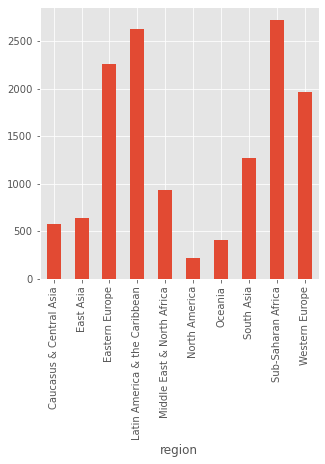

In [5]:
plt.figure(figsize=(5,5))
df.groupby('region')['womens_freedom'].sum().plot(kind='bar')

<AxesSubplot:xlabel='region'>

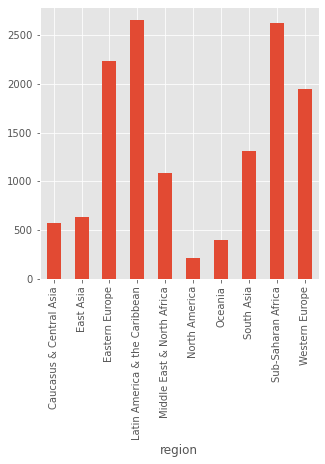

In [6]:
plt.figure(figsize=(5,5))
df.groupby('region')['pf_ss_women'].sum().plot(kind='bar')

## The more freedom of trade the better the human freedom.

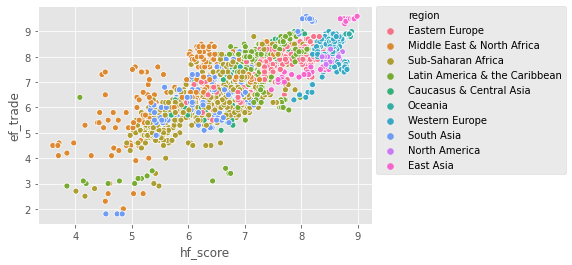

In [7]:
sns.scatterplot(x='hf_score', y='ef_trade',hue='region', data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

## The same is true for access to legal protection. There are outliers in the MENA region, Europe, and Latin America.

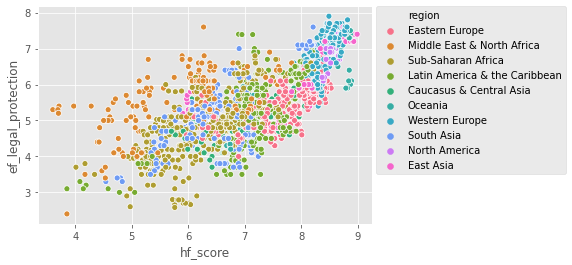

In [8]:
sns.scatterplot(x='hf_score', y='ef_legal_protection',hue='region', data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

## The compliance with trade in relation with human freedom is not as linear. It seems that a high regulatory compliance does not always guaranteed a high human freedom score. Environmental, social,and governance factors may also play a part.

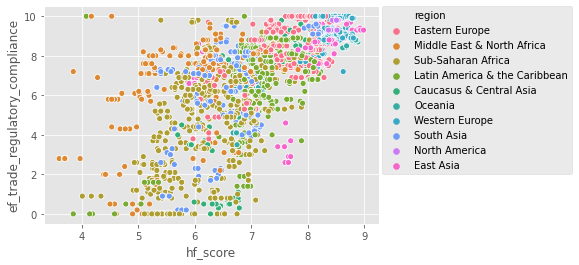

In [9]:
sns.scatterplot(x='hf_score', y='ef_trade_regulatory_compliance',hue='region', data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

## The movement of foreign trade and the regulatory compliance tend to rise as the human freedom score rises. There may be some underlying factors like port infrastructure that limit the movement of trade but will not affect the human freedom.

In [10]:
fig = px.scatter_3d(df, x='hf_score', y='ef_trade_regulatory_compliance', 
                    z='ef_trade_movement_foreign',
                   color='region', hover_name='countries')
fig.show()

fig.write_html('trade.html')

## Freedom from bribes will directly affect the human freedom.  The presence of bribes leads to the flow of illicit trade and illicit financial flows, in and out of a given country or region.

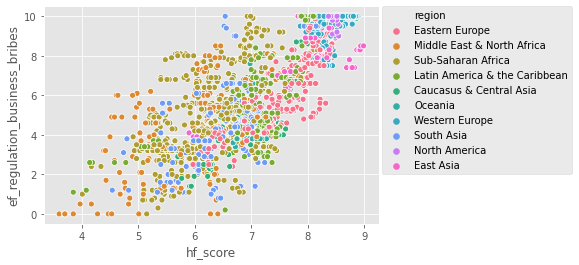

In [11]:
sns.scatterplot(x='hf_score', y='ef_regulation_business_bribes',hue='region', data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

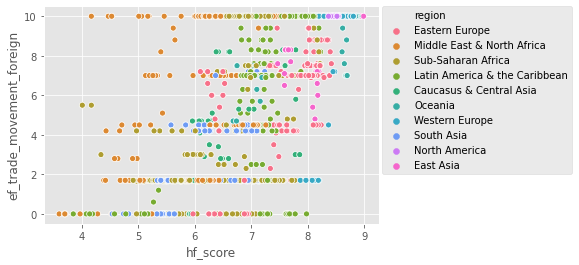

In [12]:
sns.scatterplot(x='hf_score', y='ef_trade_movement_foreign',hue='region', data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

## Suppression of media can hide human rights violations, government abuse, and environmental crimes. Preventing those suffering from getting the help they need.

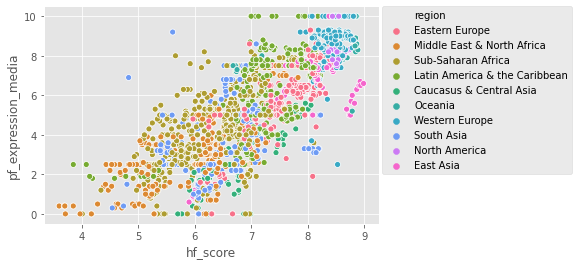

In [13]:
sns.scatterplot(x='hf_score', y='pf_expression_media',hue='region', data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

## For the most part female genital mutilation occurs in the MENA region and Sub-Saharan Africa and generally have a lower human freedom score.  The overall safety of women would also depend on the culture and social norms. 10 would be more freedom from genital mutilation.

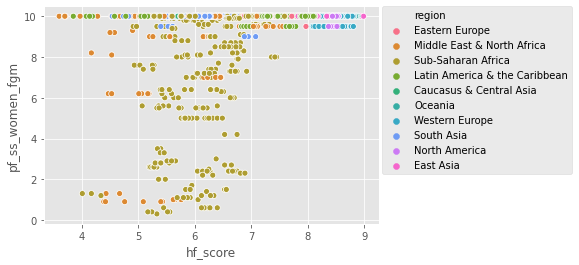

In [14]:
sns.scatterplot(x='hf_score', y='pf_ss_women_fgm',hue='region', data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

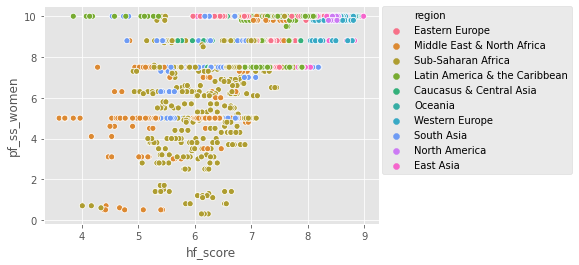

In [22]:
sns.scatterplot(x='hf_score', y='pf_ss_women',hue='region', data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [4]:
fig = px.scatter_3d(df, x='pf_ss_disappearances_violent', y='pf_ss_disappearances_organized', 
                    z='pf_ss_homicide',
                   color='hf_score', hover_name='countries')
fig.show()

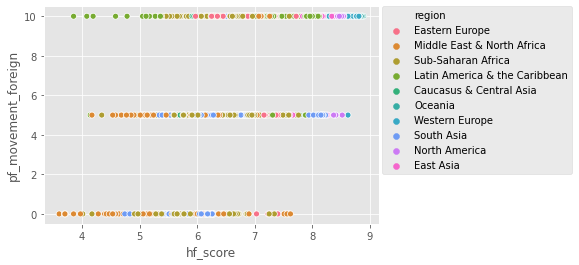

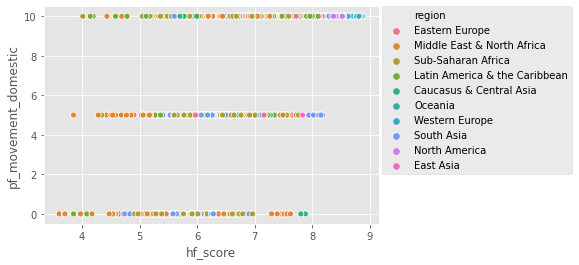

In [23]:
sns.scatterplot(x='hf_score', y='pf_movement_foreign',hue='region', data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()
sns.scatterplot(x='hf_score', y='pf_movement_domestic',hue='region', data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

## I think this chart is self explanatory.  Without proper court and legal systems in place, citizens and government officials are not held accountable for any crimes committed.  Giving free reign for criminal and terror groups to take over and tribal law to spread.

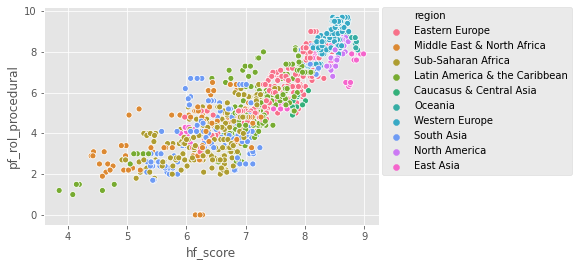

In [24]:
sns.scatterplot(x='hf_score', y='pf_rol_procedural',hue='region', data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

## Clustering

In [48]:
from sklearn.cluster import KMeans
cluster = df[['hf_score', 'ef_trade']]

In [51]:
cluster.isnull().sum()

hf_score    80
ef_trade    81
dtype: int64

In [53]:
cluster = cluster.dropna()

In [54]:
km = KMeans(n_init=300, max_iter =200)
preds = km.fit_predict(cluster)
cluster['preds'] = preds

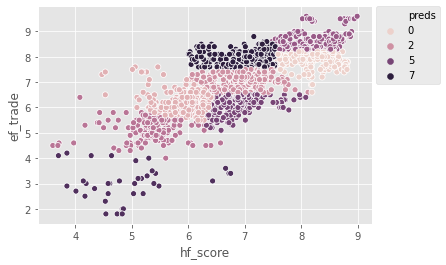

In [56]:
sns.scatterplot(x='hf_score', y='ef_trade',hue='preds', data=cluster)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

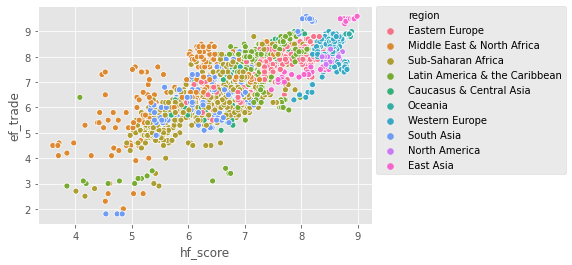

In [47]:
sns.scatterplot(x='hf_score', y='ef_trade',hue='region', data=df)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [57]:
fig = px.scatter_3d(cluster, x='hf_score', y='ef_trade', 
                    z='preds')
fig.show()